In [2]:
!pip install retina-face

In [1]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import pandas as pd

In [13]:
img_path = "D:\\NCKH\deepface-master\\result\\test1\\5cd02928b31f17414e0e13.jpg"

In [14]:
img = cv2.imread(img_path)

In [15]:
obj = RetinaFace.detect_faces(img_path)

In [16]:
len(obj.keys())

6

In [18]:
for key in obj.keys():
    identity = obj[key]
    print(identity)
    facial_area = identity["facial_area"]
    cv2.rectangle(img, (facial_area[2], facial_area[3]),(facial_area[0], facial_area[1]), (255,255,255),1)

{'score': 0.9992714524269104, 'facial_area': [835, 417, 985, 611], 'landmarks': {'right_eye': [892.13086, 493.08694], 'left_eye': [959.0786, 508.13443], 'nose': [924.99945, 541.5962], 'mouth_right': [880.61694, 558.12067], 'mouth_left': [936.7554, 570.7409]}}
{'score': 0.9992510676383972, 'facial_area': [275, 549, 459, 742], 'landmarks': {'right_eye': [338.27472, 618.165], 'left_eye': [420.62503, 621.70746], 'nose': [384.7587, 657.5991], 'mouth_right': [340.16537, 686.46625], 'mouth_left': [413.3587, 689.2896]}}
{'score': 0.9991577863693237, 'facial_area': [2197, 436, 2372, 654], 'landmarks': {'right_eye': [2234.8887, 533.5628], 'left_eye': [2313.487, 530.30237], 'nose': [2268.4893, 569.20636], 'mouth_right': [2244.162, 602.533], 'mouth_left': [2311.9534, 599.30853]}}
{'score': 0.9987903237342834, 'facial_area': [1827, 501, 2046, 775], 'landmarks': {'right_eye': [1859.2754, 611.7959], 'left_eye': [1959.4443, 615.1833], 'nose': [1889.4602, 669.5461], 'mouth_right': [1869.0787, 716.08844

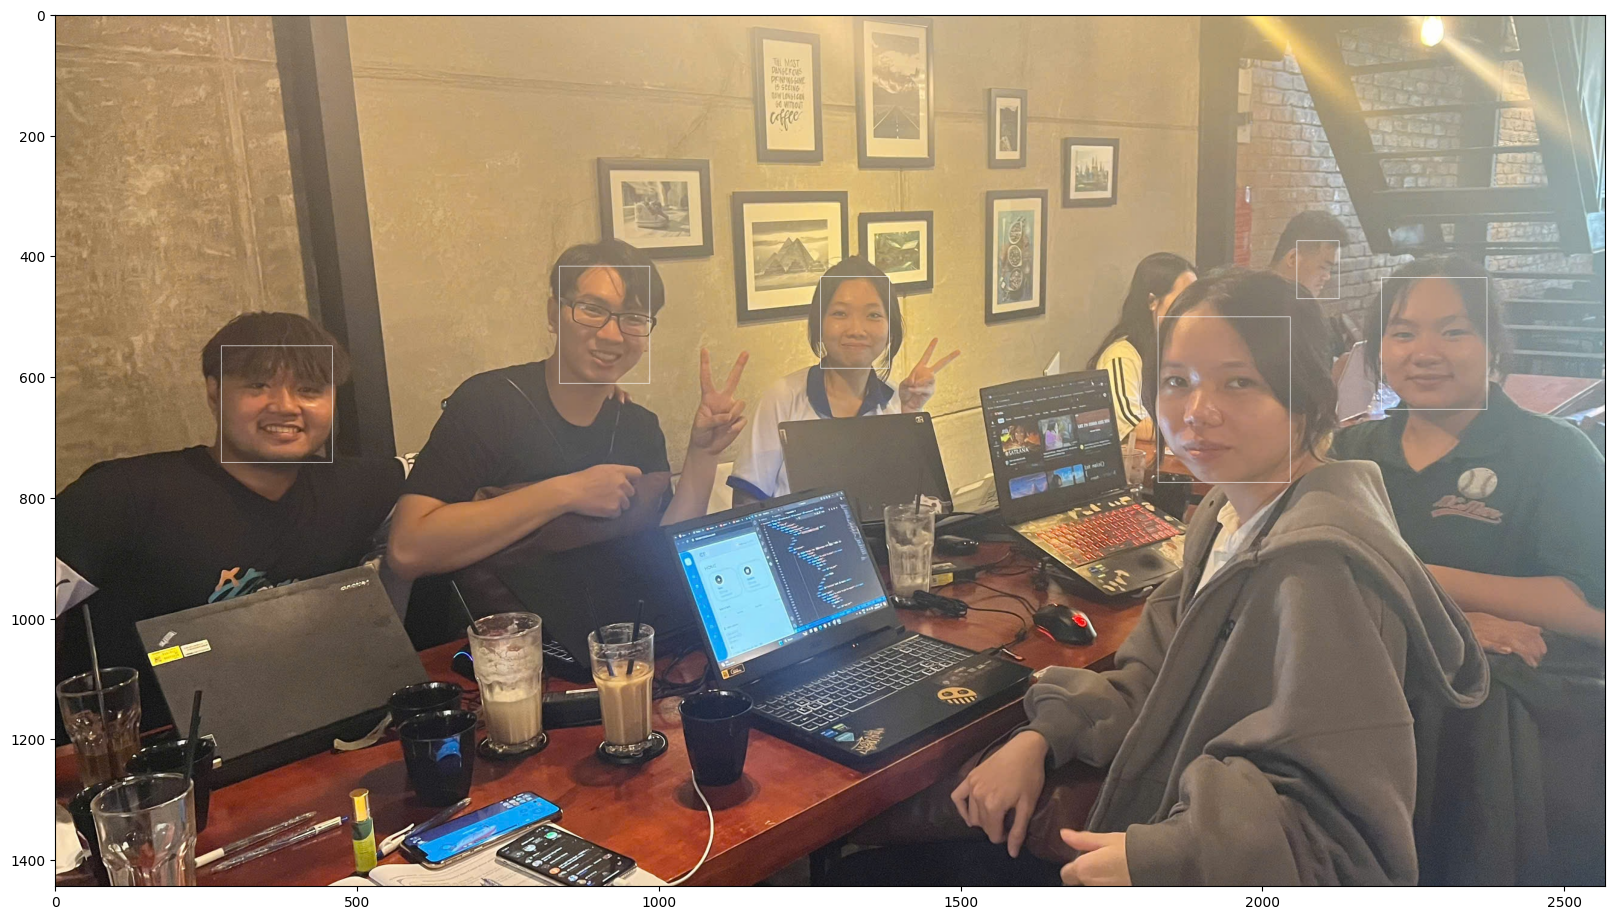

In [19]:
plt.figure(figsize = (20,20))
plt.imshow(img[:, :, ::-1])
plt.show()

In [48]:
for key in obj.keys():
    identity = obj[key]
    print(identity)
    facial_area = identity["facial_area"]
    cv2.rectangle(img, (facial_area[2], facial_area[3]),(facial_area[0], facial_area[1]), (255,255,255),1)
    dfs=DeepFace.find(img_path=img_path, db_path=db_path, model_name='VGG-Face', detector_backend = 'retinaface', refresh_database = False, distance_metric="cosine")
    pd.set_option('display.max_rows', None)
    print(dfs)

{'score': 0.9995560050010681, 'facial_area': [637, 377, 752, 514], 'landmarks': {'right_eye': [655.0023, 429.6036], 'left_eye': [703.87854, 428.4538], 'nose': [671.0516, 457.87735], 'mouth_right': [662.1009, 482.79095], 'mouth_left': [698.46405, 482.1028]}}
24-08-12 17:00:02 - Could be some changes in face-db not tracked.Set refresh_database to true to assure that any changes will be tracked.
24-08-12 17:00:02 - Searching test1/z5717486869403_1b6763ca4bfe62b43ec5ddd389adc3ee.jpg in 221 length datastore
24-08-12 17:00:09 - find function duration 7.047548294067383 seconds
[                                  identity  \
0     ./face-db\B2111989\img1_front(1).jpg   
1     ./face-db\B2111989\img4_front(4).jpg   
2     ./face-db\B2111989\img3_front(3).jpg   
3     ./face-db\B2111989\img2_front(2).jpg   
4     ./face-db\B2111989\img0_front(0).jpg   
5     ./face-db\B2111989\img6_front(6).jpg   
6     ./face-db\B2111989\img7_front(7).jpg   
7     ./face-db\B2111989\img5_front(5).jpg   
8     ./

VERIFY FACE

In [9]:
import cv2
from deepface import DeepFace  # Assuming DeepFace for face recognition
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import numpy as np
import os  # Import the os module

In [10]:
# Load image and detect faces
db_path = "face-db"
img_path = "D:\\NCKH\deepface-master\\result\\test1\\b688b78123b687e8dea76.jpg"
img = cv2.imread(img_path)
obj = RetinaFace.detect_faces(img_path)

In [11]:
# Function to compare detected faces with database
def verify_faces(img, obj, db_path):
    for key in obj.keys():
        identity = obj[key]
        facial_area = identity["facial_area"]
        
        # Crop the detected face
        detected_face = img[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]]
        
        # Get the embedding of the detected face
        detected_face_embedding_list = DeepFace.represent(detected_face, model_name='Facenet')
        detected_face_embedding = detected_face_embedding_list[0]['embedding']  # Access the first item in the list

        # Loop through all faces in the database to find a match
        match_found = False
        for root, dirs, files in os.walk(db_path):
            for file in files:
                if file.endswith(("jpg", "jpeg", "png")):
                    db_face_path = os.path.join(root, file)
                    db_face = cv2.imread(db_face_path)
                    
                    # Get the embedding of the face in the database
                    db_face_embedding_list = DeepFace.represent(db_face, model_name='Facenet')
                    db_face_embedding = db_face_embedding_list[0]['embedding']  # Access the first item in the list

                    # Compare the embeddings
                    distance = np.linalg.norm(np.array(detected_face_embedding) - np.array(db_face_embedding))
                    threshold = 0.6  # This threshold value might vary depending on the model
                    if distance < threshold:
                        match_found = True
                        print(f"Match found for face in {file} with distance: {distance}")
                        break
            
            if match_found:
                break

        # Draw rectangle around the detected face
        color = (0, 255, 0) if match_found else (0, 0, 255)  # Green for match, red for no match
        cv2.rectangle(img, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), color, 2)

    plt.figure(figsize=(20, 20))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


In [12]:
# Run face verification
verify_faces(img, obj, db_path)

ValueError: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [ ]:
print(detected_face_embedding_dict)